<a href="https://colab.research.google.com/github/donlee4u/ML_Class/blob/main/Lab_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br>

# 퍼셉트론(Perceptron)

<br>

<br>

- 입력(Feature) 데이터  $x = \begin{bmatrix}1\\ x_1\\ \vdots\\ x_d \end{bmatrix}      \quad  \quad $weights $\omega = \begin{bmatrix}\omega_0 \\ \omega_1 \\ \vdots\\ \omega_d \end{bmatrix}$

<br>

- 분류경계선(decision boundary) f(x)  : feature x 와 weight w 선형조합(linear combination)

<br>
$$f(x) = \omega_0 + \omega^Tx  = \omega_0 + \omega_1x_1 + \cdots + w_d x_d = 0 \qquad (x_0 = 1)$$
<br>

$$\begin{align*} \text{If} \;
& \sum\limits_{i=1}^{d}\omega_ix_i > \text{threshold}, --> 1\\
\text{If} \;
& \sum\limits_{i=1}^{d}\omega_ix_i < \text{threshold}. --> -1
\end{align*}$$

<br><br>

$$h(x) = \text{sign} \left(\left( \sum\limits_{i=1}^{d}\omega_ix_i \right)- \text{threshold} \right) = \text{sign}\left(\left( \sum\limits_{i=1}^{d}\omega_ix_i \right)+ \omega_0\right) = \text{sign}\left( \sum\limits_{i=0}^{d}\omega_ix_i \right)$$
<br>
<br>

- Sign function :

<br>
$$
\text{sign}(x) =
\begin{cases}
1, &\text{if }\; x > 0\\
0, &\text{if }\; x = 0\\
-1, &\text{if }\; x < 0
\end{cases} $$

- vector form
<br>

$$h(x) = \text{sign}\left( \omega^T x \right)$$

<br>

__Perceptron Diagram__
<br><br>
<center>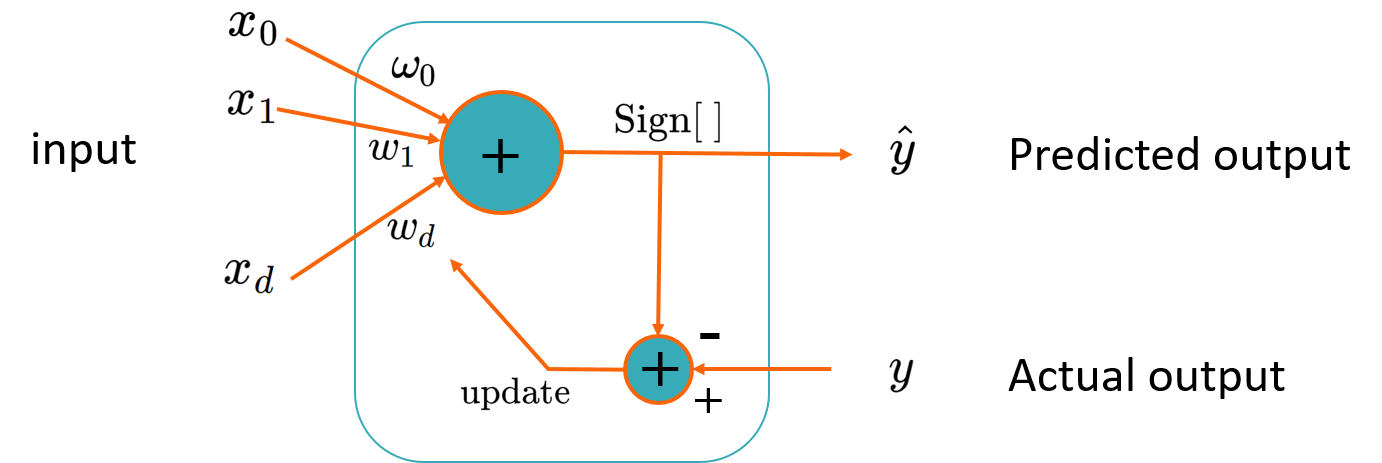</center>
<br><br>


<br>

# Perceptron Algorithm

<br>

- The perceptron 예측함수  $$ \quad  \hat{y} = h(x) = \text{sign}\left( \omega^Tx \right)$$

<br>

- 학습 데이터 set

$$(x_1, y_1), (x_2, y_2), \cdots, (x_N, y_N) \quad \text{where } y_i \in \{-1,1\}$$

<br>

1. 예측값과 실제값이 서로 다른 점만 선택해서 w를 업데이트

<br>
$$ \hat{y} =\text{sign}\left(\omega^Tx_n \right) \neq y_n$$

<br>

2. Weight vector w값을 반복적으로 업데이트

<br>

$$\omega \leftarrow \omega + y_nx_n$$
<br>


<br>

__Perceptron Updates 증명__

<br>

- Let's look at a misclassified positive example ($y_n = +1$)
  - perceptron (wrongly) thinks $\omega_{old}^T x_n < 0$

<br>

- Updates would be

<br>

$$ \begin{align*}\omega_{new} &= \omega_{old} + y_n x_n = \omega_{old} + x_n \\ \\
\omega_{new}^T x_n &= (\omega_{old} + x_n)^T x_n = \omega_{old}^T x_n + x_n^T x_n  \geq \omega_{old}^T x_n \end{align*}$$

<br>

- Thus $\omega_{new}^T x_n$ is <font color='red'>less negative</font> than $\omega_{old}^T x_n$

<br>

# Perceptron in Python


$$f(x) = \omega_0 + \omega^Tx  = \omega_0 + \omega_1x_1 + \omega_2x_2  = 0 \qquad (x_0 = 1)$$

<br>

$$
\begin{align*}
\omega &= \begin{bmatrix} \omega_0 \\ \omega_1 \\ \omega_2\end{bmatrix} \qquad
x = \begin{bmatrix} \left(x^{(1)}\right)^T \\ \left(x^{(2)}\right)^T \\ \left(x^{(3)}\right)^T\\ \vdots \\ \left(x^{(m)}\right)^T \end{bmatrix} = \begin{bmatrix} 1 & x_1^{(1)} & x_2^{(1)} \\ 1 & x_1^{(2)} & x_2^{(2)} \\ 1 & x_1^{(3)} & x_2^{(3)}\\\vdots & \vdots & \vdots \\ 1 & x_1^{(m)} & x_2^{(m)}\end{bmatrix} \qquad
y = \begin{bmatrix}y^{(1)} \\ y^{(2)} \\ y^{(3)}\\ \vdots \\ y^{(m)} \end{bmatrix}
\end{align*}$$

<br>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#training data gerneration
m = 100
x1 = 8*np.random.rand(m, 1)
x2 = 7*np.random.rand(m, 1) - 4

f = 0.8*x1 + x2 - 3

In [ ]:
C1 = np.where(f >= 1)
C0 = np.where(f < -1)
print(C1)
print(C0)

In [ ]:
C1 = np.where(f >= 1)[0]
C0 = np.where(f < -1)[0]
print(C1)
print(C0)
print(C1.shape)
print(C0.shape)

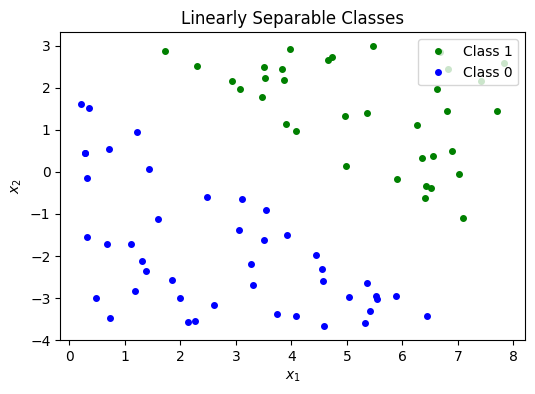

In [ ]:
plt.figure(figsize = (6, 4))
plt.plot(x1[C1], x2[C1], 'go', markersize = 4, label = 'Class 1')
plt.plot(x1[C0], x2[C0], 'bo', markersize = 4, label = 'Class 0')
plt.title('Linearly Separable Classes')
plt.legend(loc = 1)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.show()

$$
\begin{align*}
\omega &= \begin{bmatrix} \omega_0 \\ \omega_1 \\ \omega_2\end{bmatrix} \qquad
x = \begin{bmatrix} \left(x^{(1)}\right)^T \\ \left(x^{(2)}\right)^T \\ \left(x^{(3)}\right)^T\\ \vdots \\ \left(x^{(m)}\right)^T \end{bmatrix} = \begin{bmatrix} 1 & x_1^{(1)} & x_2^{(1)} \\ 1 & x_1^{(2)} & x_2^{(2)} \\ 1 & x_1^{(3)} & x_2^{(3)}\\\vdots & \vdots & \vdots \\ 1 & x_1^{(m)} & x_2^{(m)}\end{bmatrix} \qquad
y = \begin{bmatrix}y^{(1)} \\ y^{(2)} \\ y^{(3)}\\ \vdots \\ y^{(m)} \end{bmatrix}
\end{align*}$$

<br>

In [ ]:
X1 = np.hstack([np.ones([C1.shape[0],1]), x1[C1], x2[C1]])
X0 = np.hstack([np.ones([C0.shape[0],1]), x1[C0], x2[C0]])
X = np.vstack([X1, X0])

y = np.vstack([np.ones([C1.shape[0],1]), -np.ones([C0.shape[0],1])])

X = np.asmatrix(X)
y = np.asmatrix(y)

In [ ]:
X1.shape

(35, 3)

<br>

$$\omega = \begin{bmatrix} \omega_0 \\ \omega_1 \\ \omega_2\end{bmatrix} \qquad  \omega \leftarrow \omega + yx \qquad $$where $(x, y)$ is a misclassified training point

<br>

In [ ]:
w = np.ones([3,1])
w = np.asmatrix(w)

n_iter = y.shape[0]
for k in range(n_iter):
    for i in range(n_iter):
        if y[i,0] != np.sign(X[i,:]*w)[0,0]:
            w += y[i,0]*X[i,:].T

print(w)

[[-20.        ]
 [  7.10121125]
 [  9.25554421]]


<br>

$$
\begin{align*}
f(x) &= \omega_0 + \omega^Tx  = \omega_0 + \omega_1x_1 + \omega_2x_2  = 0  \qquad ----> \qquad  x_2 = -\frac{\omega_1}{\omega_2} x_1 - \frac{\omega_0}{\omega_2}
\end{align*}
$$
<br>

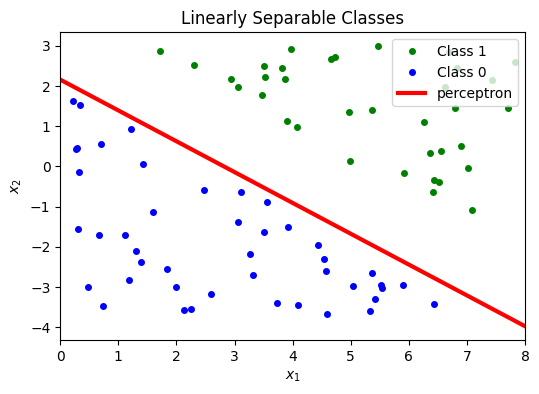

In [ ]:
x1p = np.linspace(0,8,100).reshape(-1,1)
x2p = - w[1,0]/w[2,0]*x1p - w[0,0]/w[2,0]

plt.figure(figsize = (6, 4))
plt.plot(x1[C1], x2[C1], 'go', markersize = 4, label = 'Class 1')
plt.plot(x1[C0], x2[C0], 'bo', markersize = 4, label = 'Class 0')
plt.plot(x1p, x2p, c = 'r', linewidth = 3, label = 'perceptron')
plt.title('Linearly Separable Classes')
plt.xlim([0, 8])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc = 1)
plt.show()


<br>

__Perceptron using Scikit-Learn__

<br><br>

$$
\begin{align*}
x &= \begin{bmatrix} \left(x^{(1)}\right)^T \\ \left(x^{(2)}\right)^T \\ \left(x^{(3)}\right)^T\\ \vdots \\ \left(x^{(m)}\right)^T \end{bmatrix} = \begin{bmatrix} x_1^{(1)} & x_2^{(1)} \\ x_1^{(2)} & x_2^{(2)} \\ x_1^{(3)} & x_2^{(3)}\\ \vdots & \vdots \\ x_1^{(m)} & x_2^{(m)}\end{bmatrix} \qquad
y = \begin{bmatrix}y^{(1)} \\ y^{(2)} \\ y^{(3)}\\ \vdots \\ y^{(m)} \end{bmatrix}
\end{align*}$$

<br>

In [ ]:
X1 = np.hstack([x1[C1], x2[C1]])
X0 = np.hstack([x1[C0], x2[C0]])
X = np.vstack([X1, X0])

y = np.vstack([np.ones([C1.shape[0],1]), -np.ones([C0.shape[0],1])])

In [ ]:
from sklearn import linear_model

clf = linear_model.Perceptron(tol=1e-3)
clf.fit(X, np.ravel(y))

In [ ]:
clf.predict([[3, -2]])

In [ ]:
clf.predict([[6, 2]])

In [ ]:
clf.coef_

In [ ]:
clf.intercept_

<br>

$$
\begin{align*}
f(x) &= \omega_0 + \omega^Tx  = \omega_0 + \omega_1x_1 + \omega_2x_2  = 0  \qquad ----> \qquad  x_2 = -\frac{\omega_1}{\omega_2} x_1 - \frac{\omega_0}{\omega_2}
\end{align*}
$$
<br>

In [ ]:
w0 = clf.intercept_[0]
w1 = clf.coef_[0,0]
w2 = clf.coef_[0,1]
print(w0, w1, w2)

<Figure size 600x400 with 0 Axes>

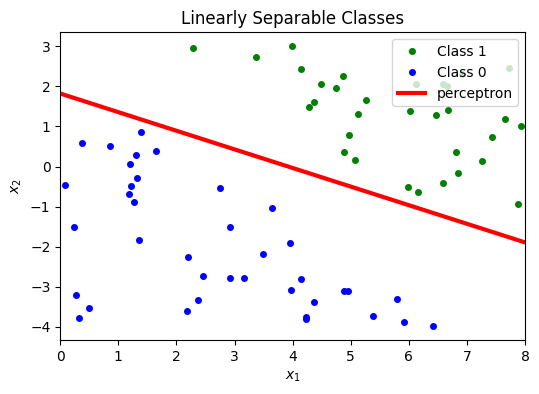

In [ ]:
x1p = np.linspace(0,8,100).reshape(-1,1)
x2p = - w1/w2*x1p - w0/w2

plt.figure(figsize = (6, 4))
plt.figure(figsize = (6, 4))
plt.plot(x1[C1], x2[C1], 'go', markersize = 4, label = 'Class 1')
plt.plot(x1[C0], x2[C0], 'bo', markersize = 4, label = 'Class 0')
plt.plot(x1p, x2p, c = 'r', linewidth = 3, label = 'perceptron')
plt.title('Linearly Separable Classes')
plt.xlim([0, 8])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc = 1)
plt.show()
